<!--- Licensed to the Apache Software Foundation (ASF) under one -->
<!--- or more contributor license agreements.  See the NOTICE file -->
<!--- distributed with this work for additional information -->
<!--- regarding copyright ownership.  The ASF licenses this file -->
<!--- to you under the Apache License, Version 2.0 (the -->
<!--- "License"); you may not use this file except in compliance -->
<!--- with the License.  You may obtain a copy of the License at -->

<!---   http://www.apache.org/licenses/LICENSE-2.0 -->

<!--- Unless required by applicable law or agreed to in writing, -->
<!--- software distributed under the License is distributed on an -->
<!--- "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY -->
<!--- KIND, either express or implied.  See the License for the -->
<!--- specific language governing permissions and limitations -->
<!--- under the License. -->

# Image Augmentation

Augmentation is the process of randomly adjusting the dataset samples used for training. As a result, a greater diversity of samples will be seen by the network and it is therefore less likely to overfit the training dataset. Some of the spurious characteristics of the dataset can be reduced using this technique. One example would be a dataset of images from the same camera having the same color tint: it's unhelpful when you want to apply this model to images from other cameras. You can avoid this by randomly shifting the colours of each image slightly and training your network on these augmented images.

Although this technique can be applied in a variety of domains, it's very common in Computer Vision, and we will focus on image augmentations in this tutorial. Some example image augmentations include random crops and flips, and adjustments to the brightness and contrast.

#### What are the prerequisites?

You should be familiar with the concept of a transform and how to apply it to a dataset before reading this tutorial.

#### Where can I find the augmentation transforms?

You can find them in the `mxnet.gluon.data.vision.transforms` module, alongside the deterministic transforms we've seen previously, such as `ToTensor`, `Normalize`, `CenterCrop` and `Resize`. Augmentations involve an element of randomness and all the augmentation transforms are prefixed with `Random`, such as `RandomResizedCrop` and `RandomBrightness`. We'll start by importing MXNet and the `transforms`.

In [1]:
import matplotlib.pyplot as plt
import mxnet as mx
from mxnet.gluon.data.vision import transforms

#### Sample Image

So that we can see the effects of all the vision augmentations, we'll take a sample image of a giraffe and apply various augmentations to it. We can see what it looks like to begin with.

[21:56:41] /work/mxnet/src/storage/storage.cc:199: Using Pooled (Naive) StorageManager for CPU


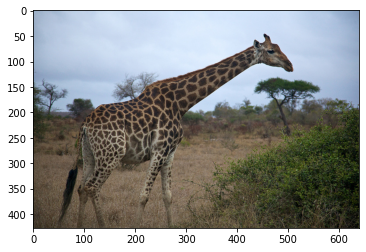

In [2]:
image_url = 'https://raw.githubusercontent.com/dmlc/web-data/master/mxnet/doc/tutorials/data_aug/inputs/0.jpg'
mx.test_utils.download(image_url, "giraffe.jpg")
example_image = mx.image.imread("giraffe.jpg")
plt.imshow(example_image.asnumpy())

![data augmentation output 5 1](https://raw.githubusercontent.com/dmlc/web-data/master/mxnet/doc/tutorials/gluon/transforms/output_5_1.png)


Since these augmentations are random, we'll apply the same augmentation a few times and plot all of the outputs. We define a few utility functions to help with this.

In [3]:
def show_images(imgs, num_rows, num_cols, scale=2):
    # show augmented images in a grid layout 
    aspect_ratio = imgs[0].shape[0]/imgs[0].shape[1]
    figsize = (num_cols * scale, num_rows * scale * aspect_ratio)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    for i in range(num_rows):
        for j in range(num_cols):
            axes[i][j].imshow(imgs[i * num_cols + j].asnumpy())
            axes[i][j].axes.get_xaxis().set_visible(False)
            axes[i][j].axes.get_yaxis().set_visible(False)
    plt.subplots_adjust(hspace=0.1, wspace=0)
    return axes

def apply(img, aug, num_rows=2, num_cols=4, scale=3):
    # apply augmentation multiple times to obtain different samples
    Y = [aug(img) for _ in range(num_rows * num_cols)]
    show_images(Y, num_rows, num_cols, scale)

## Spatial Augmentation

One form of augmentation affects the spatial position of pixel values. Using combinations of slicing, scaling, translating, rotating and flipping the values of the original image can be shifted to create new images. Some operations (like scaling and rotation) require interpolation as pixels in the new image are combinations of pixels in the original image.

### `RandomResizedCrop`

Many Computer Visions tasks, such as image classification and object detection, should be robust to changes in the scale and position of objects in the image. You can incorporate this into the network using pooling layers, but an alternative method is to crop random regions of the original image. 

As an example, we randomly (using a uniform distribution) crop a region of the image with:

* an area of 10% to 100% of the original area
* a ratio of width to height between 0.5 and 2

And then we resize this cropped region to 200 by 200 pixels.

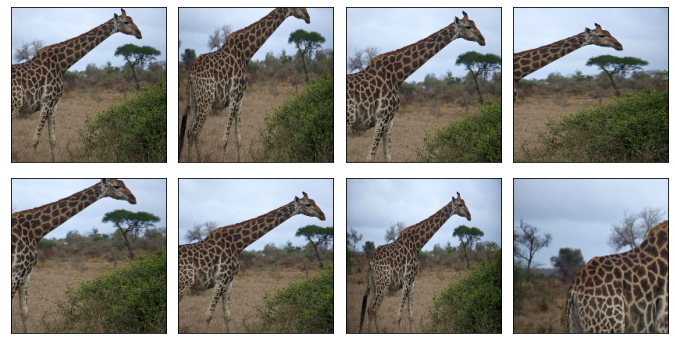

In [4]:
shape_aug = transforms.RandomResizedCrop(size=(200, 200),
                                         scale=(0.1, 1),
                                         ratio=(0.5, 2))
apply(example_image, shape_aug)

![data augmentation output 12 0](https://raw.githubusercontent.com/dmlc/web-data/master/mxnet/doc/tutorials/gluon/transforms/output_12_0.png)


### `RandomFlipLeftRight`

A simple augmentation technique is flipping. Usually flipping horizontally doesn't change the category of object and results in an image that's still plausible in the real world. Using `RandomFlipLeftRight`, we randomly flip the image horizontally 50% of the time.

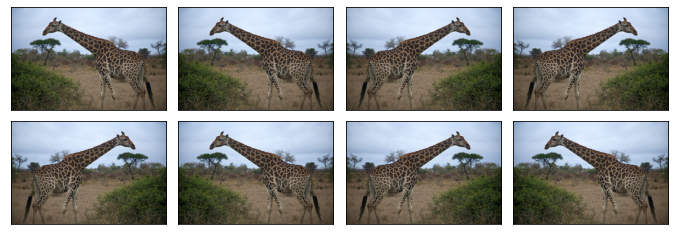

In [5]:
apply(example_image, transforms.RandomFlipLeftRight())

![data augmentation output 15 0](https://raw.githubusercontent.com/dmlc/web-data/master/mxnet/doc/tutorials/gluon/transforms/output_15_0.png)


### `RandomFlipTopBottom`

Although it's not as common as flipping left and right, you can flip the image vertically 50% of the time with `RandomFlipTopBottom`. With our giraffe example, we end up with less plausible samples that horizontal flipping, with the ground above the sky in some cases.

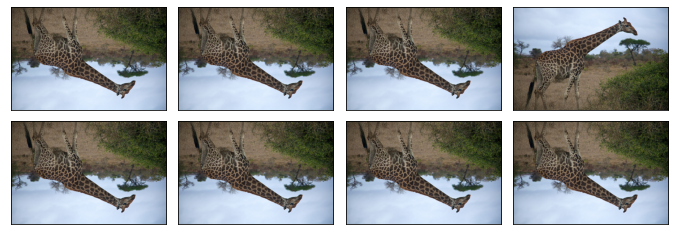

In [6]:
apply(example_image, transforms.RandomFlipTopBottom())

![data augmentation output 18 0](https://raw.githubusercontent.com/dmlc/web-data/master/mxnet/doc/tutorials/gluon/transforms/output_18_0.png)


## Color Augmentation

Usually, exact coloring doesn't play a significant role in the classification or detection of objects, so augmenting the colors of images is a good technique to make the network invariant to color shifts. Color properties that can be changed include brightness, contrast, saturation and hue.

### `RandomBrightness`

Use `RandomBrightness` to add a random brightness jitter to images. Use the `brightness` parameter to control the amount of jitter in brightness, with value from 0 (no change) to 1 (potentially large change). `brightness` doesn't specify whether the brightness of the augmented image will be lighter or darker, just the potential strength of the effect. Specifically the augmentation is given by:

```
alpha = 1.0 + random.uniform(-brightness, brightness)
image *= alpha
```


So by setting this to 0.5 we randomly change the brightness of the image to a value between 50% ($1-0.5$) and 150% ($1+0.5$) of the original image.

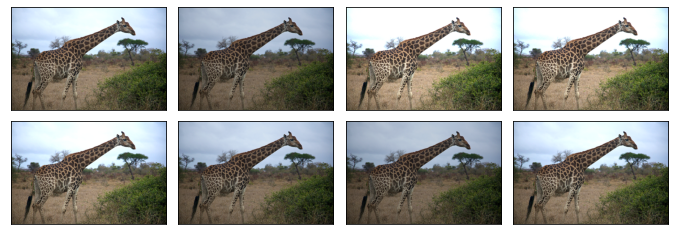

In [7]:
apply(example_image, transforms.RandomBrightness(0.5))

![data augmentation output 23 0](https://raw.githubusercontent.com/dmlc/web-data/master/mxnet/doc/tutorials/gluon/transforms/output_23_0.png)


### `RandomContrast`

Use `RandomContrast` to add a random contrast jitter to an image. Contrast can be thought of as the degree to which light and dark colors in the image differ. Use the `contrast` parameter to control the amount of jitter in contrast, with value from 0 (no change) to 1 (potentially large change). `contrast` doesn't specify whether the contrast of the augmented image will be higher or lower, just the potential strength of the effect. Specifically, the augmentation is given by:

```
coef = nd.array([[[0.299, 0.587, 0.114]]])
alpha = 1.0 + random.uniform(-contrast, contrast)
gray = image * coef
gray = (3.0 * (1.0 - alpha) / gray.size) * nd.sum(gray)
image *= alpha
image += gray
```


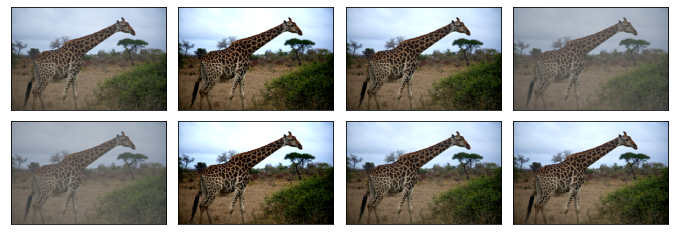

In [8]:
apply(example_image, transforms.RandomContrast(0.5))

![data augmentation output 26 0](https://raw.githubusercontent.com/dmlc/web-data/master/mxnet/doc/tutorials/gluon/transforms/output_26_0.png)


### `RandomSaturation`

Use `RandomSaturation` to add a random saturation jitter to an image. Saturation can be thought of as the 'amount' of color in an image. Use the `saturation` parameter to control the amount of jitter in saturation, with value from 0 (no change) to 1 (potentially large change). `saturation` doesn't specify whether the saturation of the augmented image will be higher or lower, just the potential strength of the effect. Specifically the augmentation is using the method detailed [here](https://beesbuzz.biz/code/16-hsv-color-transforms).

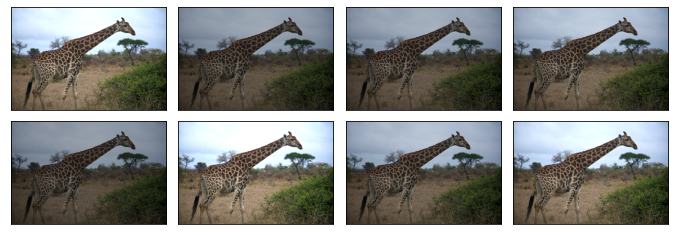

In [9]:
apply(example_image, transforms.RandomSaturation(0.5))

![data augmentation output 29 0](https://raw.githubusercontent.com/dmlc/web-data/master/mxnet/doc/tutorials/gluon/transforms/output_29_0.png)


### `RandomHue`

Use `RandomHue` to add a random hue jitter to images. Hue can be thought of as the 'shade' of the colors in an image. Use the `hue` parameter to control the amount of jitter in hue, with value from 0 (no change) to 1 (potentially large change). `hue` doesn't specify whether the hue of the augmented image will be shifted one way or the other, just the potential strength of the effect. Specifically the augmentation is using the method detailed [here](https://beesbuzz.biz/code/16-hsv-color-transforms).

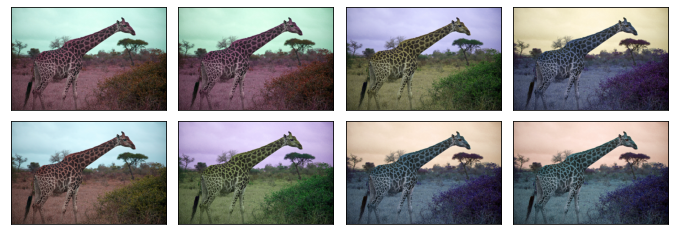

In [10]:
apply(example_image, transforms.RandomHue(0.5))

![data augmentation output 32 0](https://raw.githubusercontent.com/dmlc/web-data/master/mxnet/doc/tutorials/gluon/transforms/output_32_0.png)


### `RandomColorJitter`

`RandomColorJitter` is a convenience transform that can be used to perform multiple color augmentations at once. You can set the `brightness`, `contrast`, `saturation` and `hue` jitters, that function the same as above for their individual transforms.

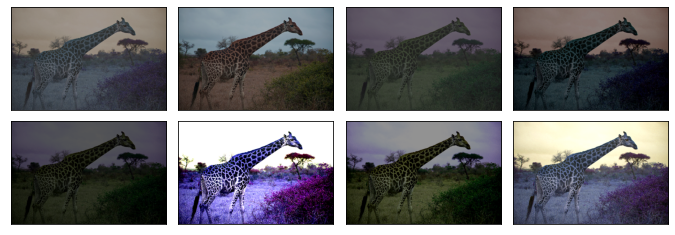

In [11]:
color_aug = transforms.RandomColorJitter(brightness=0.5,
                                         contrast=0.5,
                                         saturation=0.5,
                                         hue=0.5)
apply(example_image, color_aug)

![data augmentation output 35 0](https://raw.githubusercontent.com/dmlc/web-data/master/mxnet/doc/tutorials/gluon/transforms/output_35_0.png)


### `RandomLighting`

Use `RandomLighting` for an AlexNet-style PCA-based noise augmentation.

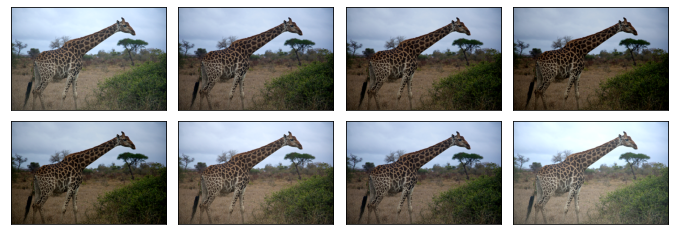

In [12]:
apply(example_image, transforms.RandomLighting(alpha=1))

![data augmentation output 38 0](https://raw.githubusercontent.com/dmlc/web-data/master/mxnet/doc/tutorials/gluon/transforms/output_38_0.png)

## Composed Augmentations

In practice, we apply multiple augmentation techniques to an image to increase the variety of images in the dataset using the `Compose` transform. We can apply 3 of the transforms we previously used above.

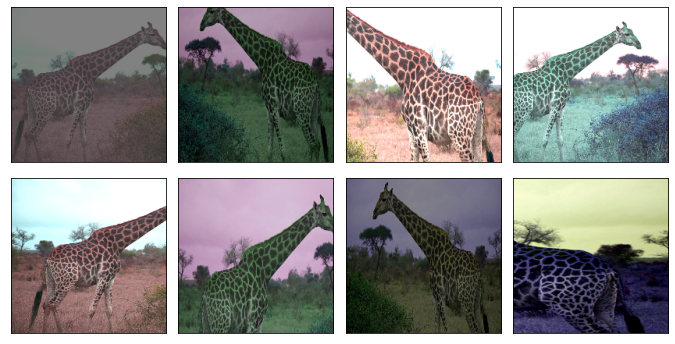

In [13]:
augs = transforms.Compose([
    transforms.RandomFlipLeftRight(), color_aug, shape_aug])
apply(example_image, augs)

![data augmentation output 41 0](https://raw.githubusercontent.com/dmlc/web-data/master/mxnet/doc/tutorials/gluon/transforms/output_41_0.png)